In [1]:
import numpy as np
from qiskit_experiments.library import StandardRB, InterleavedRB
from qiskit_experiments.framework import ParallelExperiment, BatchExperiment
import qiskit.circuit.library as circuits

In [2]:
from qiskit import assemble
from qiskit_ibm_provider import IBMProvider
#from qiskit import IBMQ
#from qiskit import execute
#from qiskit.tools import job_monitor

In [3]:
IBMProvider.save_account('', overwrite=True)
IBMProvider()

<IBMProvider>

In [4]:
#provider = IBMProvider(instance="ibm-q-ncsu/nc-state/vlsi-cad-tools")
provider = IBMProvider(instance="ibm-q-ncsu/reservations/reservations")
backend = provider.get_backend('ibmq_kolkata')

In [52]:
lengths_2_qubit = np.arange(1, 10, 3)
lengths_1_qubit = np.arange(1, 800, 200)
num_samples = 10
seed = 1010
qubits = (0, 1,2,3,4)

# Run a 1-qubit RB experiment on qubits 1, 2 to determine the error-per-gate of 1-qubit gates
single_exps = BatchExperiment(
    [
        StandardRB([qubit], lengths_1_qubit, num_samples=num_samples, seed=seed)
        for qubit in qubits
    ],
    flatten_results=True,
)
expdata_1q = single_exps.run(backend, shots = 8000).block_for_results()

C:\Users\Ahmad\anaconda3\envs\new_qc\lib\site-packages\qiskit_ibm_provider\ibm_backend.py:447: UserWarning: The backend ibmq_kolkata is currently paused.
  warnings.warn(f"The backend {self.name} is currently paused.")


C:\Users\Ahmad\anaconda3\envs\new_qc\lib\site-packages\qiskit_ibm_provider\ibm_backend.py:447: UserWarning: The backend ibmq_kolkata is currently paused.
  warnings.warn(f"The backend {self.name} is currently paused.")


Gate error ratio: {}


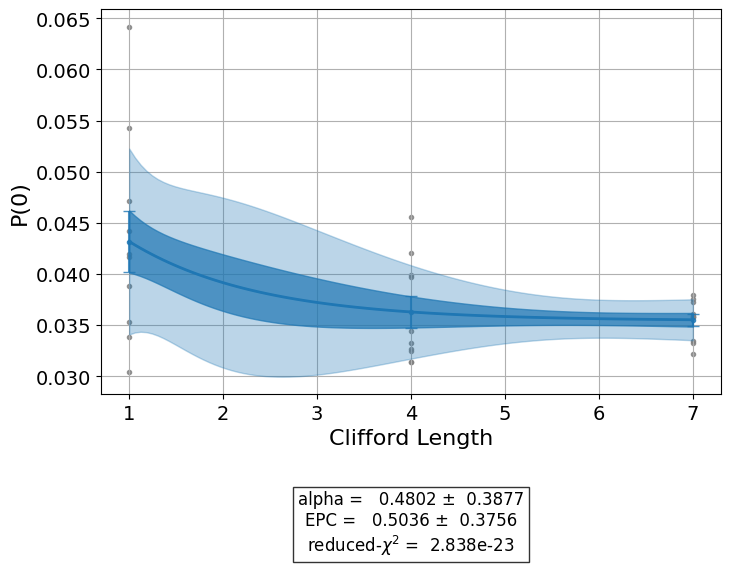

AnalysisResult
- name: @Parameters_RBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_rb_decay(x) = a * alpha ** x + b
 - success: True
 - number of function evals: 45
 - degree of freedom: 0
 - chi-square: 2.8379911056019906e-23
 - reduced chi-square: 2.8379911056019906e-23
 - Akaike info crit.: -153.04491894850673
 - Bayesian info crit.: -155.7490820825024
 - init params:
  * a = 0.014058997539728642
  * alpha = 0.8487164325551659
  * b = 0.03125
 - fit params:
  * a = 0.016127613310661468 ± 0.01427224044890468
  * alpha = 0.48016748205523474 ± 0.3876877780785013
  * b = 0.035438146762265664 ± 0.0009455747562523042
 - correlations:
  * (a, alpha) = -0.8900925155204047
  * (alpha, b) = -0.742747711024235
  * (a, b) = 0.5616065153092076
- quality: good
- extra: <2 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3', 'Q4']
- verified: False
AnalysisResult
- name: alpha
- value: 0.5+/-0.4
- χ²: 2.8379911056019906e-23
- quality: good
- ex

In [53]:
exp_2q = StandardRB(qubits, lengths_2_qubit, num_samples=num_samples, seed=seed)

# Use the EPG data of the 1-qubit runs to ensure correct 2-qubit EPG computation
exp_2q.analysis.set_options(epg_1_qubit=expdata_1q.analysis_results())

# Run the 2-qubit experiment
expdata_2q = exp_2q.run(backend, shots = 8000).block_for_results()

# View result data
print("Gate error ratio: %s" % expdata_2q.experiment.analysis.options.gate_error_ratio)
display(expdata_2q.figure(0))
for result in expdata_2q.analysis_results():
    print(result)

In [ ]:
lengths_2_qubit = np.arange(1, 10, 3)
lengths_1_qubit = np.arange(1, 800, 200)
num_samples = 10
seed = 1010
qubits = (0, 1,2,3,4)
exp_2q = StandardRB(qubits, lengths_2_qubit, num_samples=num_samples, seed=seed)

In [ ]:
exp_2q.circuits()[0].decompose().depth()

In [ ]:
exp_2q.circuits()[0].draw('mpl')

In [ ]:
print(c.decompose().depth())
c.decompose().draw("mpl")